# Самостоятельный проект по теме «Принятие решений в бизнесе»

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Нужно приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Данные для первой части проекта (файл hypothesis.csv):
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части проекта:
А) файл orders.csv:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Б) файл visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

# Загрузка и предобработка данных

Для начала загрузим необходимые для работы библиотеки

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

In [2]:
# загрузим датасет с гипотезами и посмотрим содержимое
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# приведем названия столбцов к нижнему регистру и проверим результаты
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# оценим качество данных
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропусков нет, типы данных корректные, файл готов к работе.

# Часть 1. Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [5]:
pd.set_option('display.max_colwidth', 1000)
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)
hypothesis[['ICE', 'hypothesis']].sort_values(by='ICE', ascending=False)

,ICE,hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


ТОП-3 наиболее перспективных гипотез: 8, 0, 7.

Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['RICE', 'hypothesis']].sort_values(by='RICE', ascending=False)

,RICE,hypothesis
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


ТОП-3 наиболее перспективных гипотез: 7, 2, 0.

Изменения связаны с тем, что при расчете RICE учитывается количество пользователей, которых затронет гипотеза. Поэтому наиболее перспективной выглядит гипотеза 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"), т.к. в обоих фреймворках она входит в ТОП-3, а также она на первом месте при расчете RICE, и затронет большое число пользователей.

# Часть 2. Анализ A/B-теста

In [7]:
# загрузим датасет orders и посмотрим 5 первых строк
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# приведем названия столбцов к нижнему регистру и проверим результаты
orders.columns = orders.columns.str.lower()
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# посмотрим общую информацию по датасету
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# изменим тип данных для графы "date" с object на date для удобства работы
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
# проверим результат
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
# проверим датасет на наличие дублей
orders.duplicated().sum()

0

Выводы по анализу и предобработке датасета orders:
* пропусков нет;
* названия столбцов приведены к нижнему регистру;
* тип данных для графы "date" поменяли с object на date для удобства работы;
* дублей нет;
* таблица готова к работе.

In [12]:
# загрузим датасет visitors и посмотрим 5 первых строк
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
# посмотрим общую информацию по датасету
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# изменим тип данных для графы "date" с object на date для удобства работы
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
# проверим результат
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
# проверим датасет на наличие дублей
visitors.duplicated().sum()

0

Выводы по анализу и предобработке датасета visitors:
* пропусков нет;
* тип данных для графы "date" поменяли с object на date для удобства работы;
* дублей нет;
* таблица готова к работе.

In [16]:
# оценим количество групп
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [17]:
# проверим, есть ли в группах совпадения по пользователям
group_a = orders[orders['group'] == 'A']['visitorid']
group_b = orders[orders['group'] == 'B']['visitorid']
orders_ab = orders.query('visitorid in @group_a and visitorid in @group_b')
orders_ab['visitorid'].unique()
print('Количество пользователей в обеих группах:', orders_ab['visitorid'].nunique())
print('Всего пользователей:', orders['visitorid'].nunique())

Количество пользователей в обеих группах: 58
Всего пользователей: 1031


Всего в таблице 1031 пользователь. При этом процент пользователей, которые одновременно присутствуют в обеих группах, составляет чуть больше 5,6% от общего числа пользователей (58 от 1031). Удаляю их, т.к. такой небольшой % не скажется отрицательно на результатах А/В теста.

In [18]:
orders = orders.query('visitorid not in @orders_ab["visitorid"]')
print('Всего пользователей осталось:', orders['visitorid'].nunique())

Всего пользователей осталось: 973


Теперь можно приступать к A/B тесту.

# 2.1 Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

Соберем данные.
1. Создим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders.
2. Объявим переменную ordersAggregated, содержащую:
* дату;
* группу A/B-теста;
* число уникальных заказов в группе теста по указанную дату включительно;
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно.
3. Объявим переменную visitorsAggregated, содержащую:
* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включительно.
4. ordersAggregated и visitorsAggregated отсортируем по столбцам 'date', 'group'.
5. Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group'
6. Присвоим столбцам cumulativeData названия.

In [19]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [20]:
# проверим корректность создания датафрейма cumulativeData, сравнив минимальные даты в этом и исходном датафрейме
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [21]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [22]:
# проверим корректность создания датафрейма cumulativeData, сравнив максимальные даты в этом и исходном датафрейме
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [23]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

Все в порядке, датафрейм cumulativeData создан корректно, можно работать с ним.

Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Построим график.

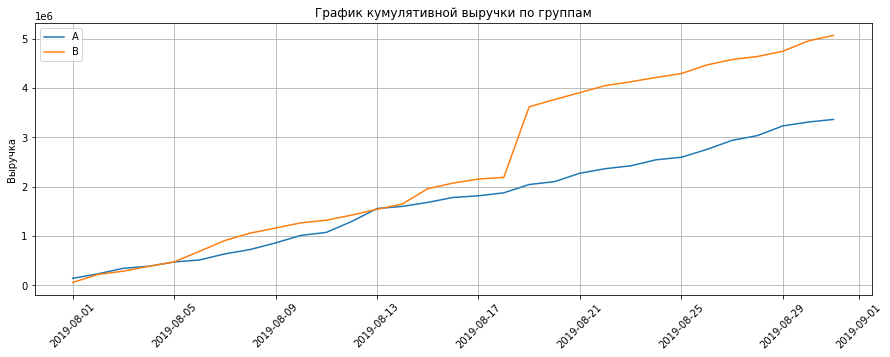

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Вывод по графику кумулятивной выручки по группам:
1. В первой половине месяца выручка группы "B" растет чуть активнее, чем у группы "A".
2. Во второй половине месяца выручка группы "В" демонстрирует сильный рост в районе 18 числа, скорее всего, это выбросы, но гипотеза нуждается в дополнительном исследовании. Далее выручка по обеим группам растет одинаковыми темпами, но отрыв выручки у группы "В" в сравнении с группой "А" остается таким же сильным за счет выброса.
3. Скорее всего в группе "B" 18 числа был крупный заказ. Если его отбросить, то графики покажут примерно одинаковый рост выручки у обеих групп, хоть и с небольшим опережением у группы "В".

# 2.2 Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

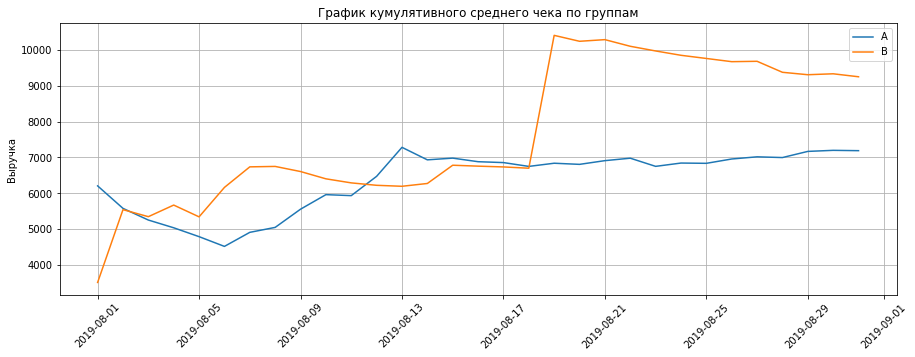

In [25]:
# построим графики кумулятивного среднего чека для каждой группы 

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Вывод по графику кумулятивного среднего чека по группам:
1. Кумулятивное значение среднего чека по группам колебается.
2. У группы "В", как и на прошлом графике, заметен сильный скачок в районе 18 числа. Причиной может быть также крупный заказ, т.к. выброс.
3. В основном у группы "В" средний чек выше среднего чека группы "А".
4. После сильного скачка величины среднего чека у группы "В" идет постепенное его уменьшение, а у группы "А", наоборот, увеличение величины среднего чека. Динамика говорит о том, что в перспективе размеры средних чеков у обеих групп сравняются.

# 2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

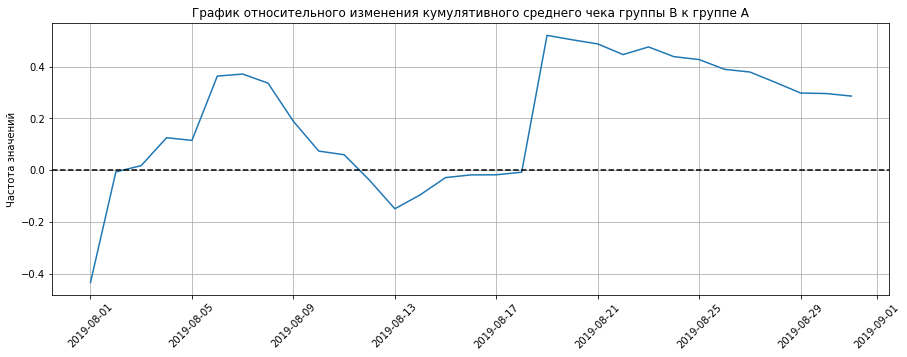

In [26]:
# объединим таблицы cumulativeRevenueA и cumulativeRevenueB и построим график относительного изменения кумулятивного среднего чека группы "B" к группе "A".

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Частота значений')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Вывод по графику относительного изменения кумулятивного среднего чека группы "B" к группе "A":

На графике видны несколько значительных и резких изменений в разные даты. Скорее всего, в эти дни были сделаны крупные заказы.

# 2.4 Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

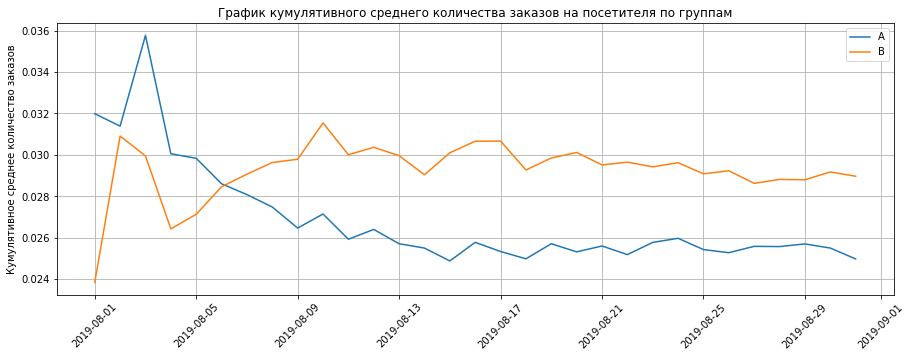

In [27]:
# Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
# Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраним данные о заказах в сегментах "A" и "B" соответственно.
# Построим графики кумулятивной конверсии по дням по группам.

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Вывод по графику кумулятивного среднего количества заказов на посетителя по группам:

1. В начале теста у группы "А" было бОльшее кумулятивное среднее количество заказов на посетителя по группам, далее это значение начало снижаться и зафиксировалась на уровне 0,25-0,26.
2. У группы "В" наоборот сначала было более низкое кумулятивное среднее количество заказов на посетителя по группам, но постепенно оно выросло и зафиксировалось на уровне 0,29.

# 2.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

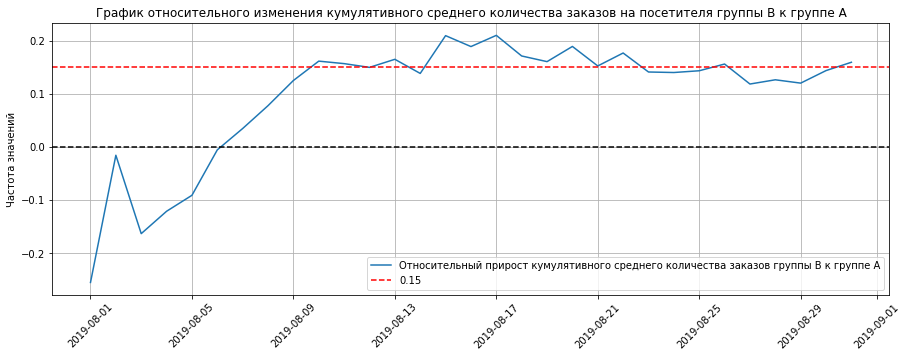

In [28]:
# объединим таблицы cumulativeDataA и cumulativeDataB, cохранив в переменной mergedCumulativeConversions.
# построим график относительного различия кумулятивной конверсии группы "B" к группе "A".

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.figure(figsize=(15,5))
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов группы B к группе A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.15, color='red', linestyle='--', label = '0.15')
plt.legend()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Частота значений')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Вывод по графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:
    
Кумулятивное среднее количество заказов на посетителя группы "В" относительно группы "А" показывает прирост в 15-20% .

# 2.6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [29]:
# создадим таблицу по заказам
orders_by_users = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'}).rename(columns={'transactionid':'orders'})
orders_by_users.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


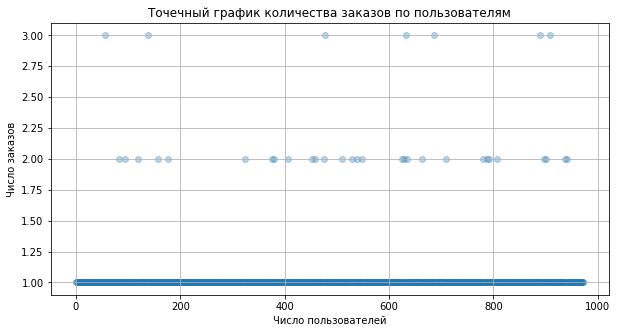

In [30]:
# построим график
x_values = pd.Series(range(0,len(orders_by_users['orders'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.3)
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов')
plt.grid()
plt.show()

Вывод по точечному графику количества заказов по пользователям:
1. Большая часть пользователей совершает лишь одну покупку.
2. Некоторые пользователи делают 2 заказа.
3. В единичных случаях пользователи делают 3 заказа.

# 2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [31]:
print('90 перцентиль:', (np.percentile(orders_by_users['orders'], [90])))
print('95 перцентиль:', (np.percentile(orders_by_users['orders'], [95])))
print('99 перцентиль:', (np.percentile(orders_by_users['orders'], [99])))

90 перцентиль: [1.]
95 перцентиль: [1.]
99 перцентиль: [2.]


1% пользователей совершили больше 2 заказов.

In [32]:
# посмотрим на максимальное количество заказов
orders_by_users['orders'].max()

3

In [33]:
# посмотрим, какое число пользователей сделало больше 2 заказов
len(orders_by_users[orders_by_users['orders'] > 2]['visitorid'])

7

Вывод по подсчету 95-й и 99-й перцентили количества заказов на пользователя:

Правильным в качестве границы для определения аномальных пользователей считать 2 заказа. Все пользователи, которые сделали больше 2 заказов, будем считать аномальными.

# 2.8 Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

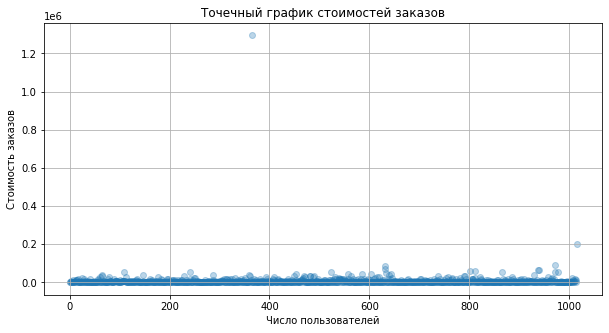

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

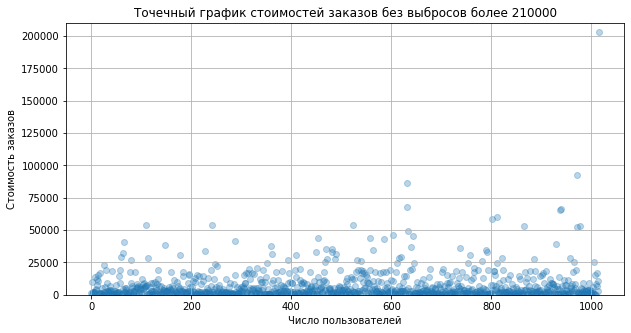

In [35]:
# построим более наглядный график без самого большого выброса
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.ylim(0, 210000)
plt.title('Точечный график стоимостей заказов без выбросов более 210000')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

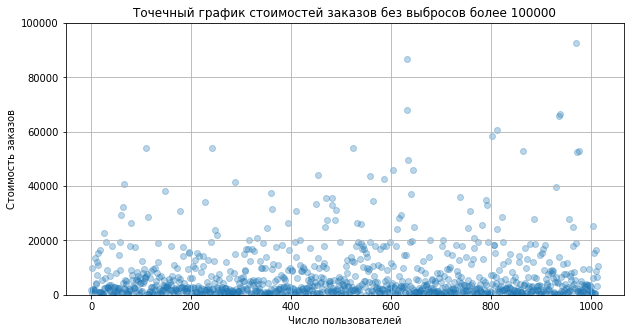

In [36]:
# построим более наглядный график без следующего крупного выброса
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Точечный график стоимостей заказов без выбросов более 100000')
plt.ylim(0, 100000)
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

Вывод по точечному графику стоимостей заказов:

На первом графике явно видны 2 выброса. Поскольку такие заказы могут исказить результаты, оставим только заказы, стоимость которых ниже 100000.

# 2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [37]:
print('90 перцентиль:', (np.percentile(orders['revenue'], [90])))
print('95 перцентиль:', (np.percentile(orders['revenue'], [95])))
print('99 перцентиль:', (np.percentile(orders['revenue'], [99])))

90 перцентиль: [17990.]
95 перцентиль: [26785.]
99 перцентиль: [53904.]


Выводы по подсчету 95-го и 99-го перцентилей стоимости заказов:
1. Не более 5% пользователей сделали заказ на сумму больше 26785.
2. Не более 1% пользователей сделали заказ на сумму больше 53904. Аномальными будем считать заказы на сумму, которая превышает это значение.

# 2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным. Сделаем выводы и предположения.

In [38]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

cummulative = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы:

А) Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов между группами по «сырым» данным нет.

Б) Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов между группами по «сырым» данным есть.

Применим критерием Манна-Уитни.

Порогом статистической значимости установим alpha = 0.05.

In [39]:
print('P-value: ''{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего группы "В" к конверсии группы "А": ''{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительный прирост среднего группы "В" к конверсии группы "А": 0.160


Вывод по статистической значимости различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным:
1. P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу. Среднее количество заказов в группе "A" не равно среднему количеству заказов в группе "B" (между выборками имеется статистическая значимость).
2. Относительный прирост среднего количества заказов группы "В" к группе "А" равен 16%.

# 2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:

А) Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по «сырым» данным нет.

Б) Альтернативная гипотеза: Статистически значимые различия в среднем чеке между группами по «сырым» данным есть.

Применим критерием Манна-Уитни.

Порогом статистической значимости установим alpha = 0.05.

In [40]:
print('P-value: ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы "В" к группе "А": ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Относительный прирост среднего чека группы "В" к группе "А": 0.287


Вывод по статистической значимости различий в среднем чеке заказа между группами по «сырым» данным:
1. P-value значительно больше 0.05, не получилось отвергнуть нулевую гипотезу. Средний чек в группе "A" равен среднему чеку в группе "B" (статистическая значимость не значительна и сделать вывод о различии нельзя).
2. Относительный прирост среднего чека группы "В" к группе "А" равен 28,7%.

# 2.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. Сделаем выводы и предположения.

Подготовим данные, очищенные от аномалий:
* 95-й и 99-й перцентили стоимости заказов равны 26785 и 53904 рублям.
* 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя.

В качестве аномальных будем считать пользователей, совершивших более 2 заказов или совершивших заказ на сумму более 53904. В результате мы уберем всего 1% пользователей с наибольшим числом заказов и с их наибольшей стоимостью.

In [41]:
usersWithManyOrders = pd.concat(
    [
        #ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        #ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(orders_by_users['orders'], [99]))]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitorid']
#usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы:

А) Нулевая гипотеза: Статистически значимых различий в среднем количестве заказов между группами по «очищенным» данным нет.

Б) Альтернативная гипотеза: Статистически значимые различия в среднем количестве заказов между группами по «очищенным» данным есть.

Применим критерием Манна-Уитни.

Порогом статистической значимости установим alpha = 0.05.

In [42]:
print('P-value: ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего группы "В" к конверсии группы "А": ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.007
Относительный прирост среднего группы "В" к конверсии группы "А": 0.189


Выводы по подсчету статистической значимости различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным:
1. P-value значительно меньше 0.05, не получилось подтвердить нулевую гипотезу. Среднее количество заказов в группе "A" не равно среднему количеству заказов в группе "B" (между выборками имеется статистическая значимость).
2. Относительный прирост среднего количества заказов группы "В" к группе "А" равен 18,9%. Изменение по сравнению с прошлыми результатами почти 3%.

# 2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:

А) Нулевая гипотеза: Статистически значимых различий в среднем чеке между группами по «очищенным» данным нет.

Б) Альтернативная гипотеза: Статистически значимые различия в среднем чеке между группами по «очищенным» данным есть.

Применим критерием Манна-Уитни.

Порогом статистической значимости установим alpha = 0.05.

In [43]:
print(
    'P-value: ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное снижение среднего чека группы "В" к группе "А": ''{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.788
Относительное снижение среднего чека группы "В" к группе "А": -0.032


Выводы по подсчету статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным:
1. P-value значительно больше 0.05, не получилось отвергнуть нулевую гипотезу. Средний чек в группе "A" равен среднему чеку в группе "B" (статистическая значимость не значительна и сделать вывод о различии нельзя).
2. Относительное снижение среднего чека группы "В" к группе "А" примерно равен 3%. Изменение по сравнению с прошлыми результатами почти 30%.

# Решение по результатам теста

Тест можно остановить и считать успешно пройденным.

Среднее количество заказов в группе "A" не равно среднему количеству заказов в группе "B" (между выборками имеется статистическая значимость) по сырым и по очищенным данным.

Средний чек в группе "A" равен среднему чеку в группе "B" (статистическая значимость не значительна и сделать вывод о различии нельзя) по сырым и по очищенным данным.

Анализ показал, что группа "В" показывает лучший результат по среднему количеству заказов.

Размер среднего чека у групп значимо не отличается.